In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv("../csv/clean.csv", sep=',')

# Sélectionnez les variables int64 + float64 afin d'afficher les histogrammes pour l'ensemble de ces variables. Qu'elles sont les variables ayant une distribution proche de SalePrice? Que peut on conclure de ces variables?

-


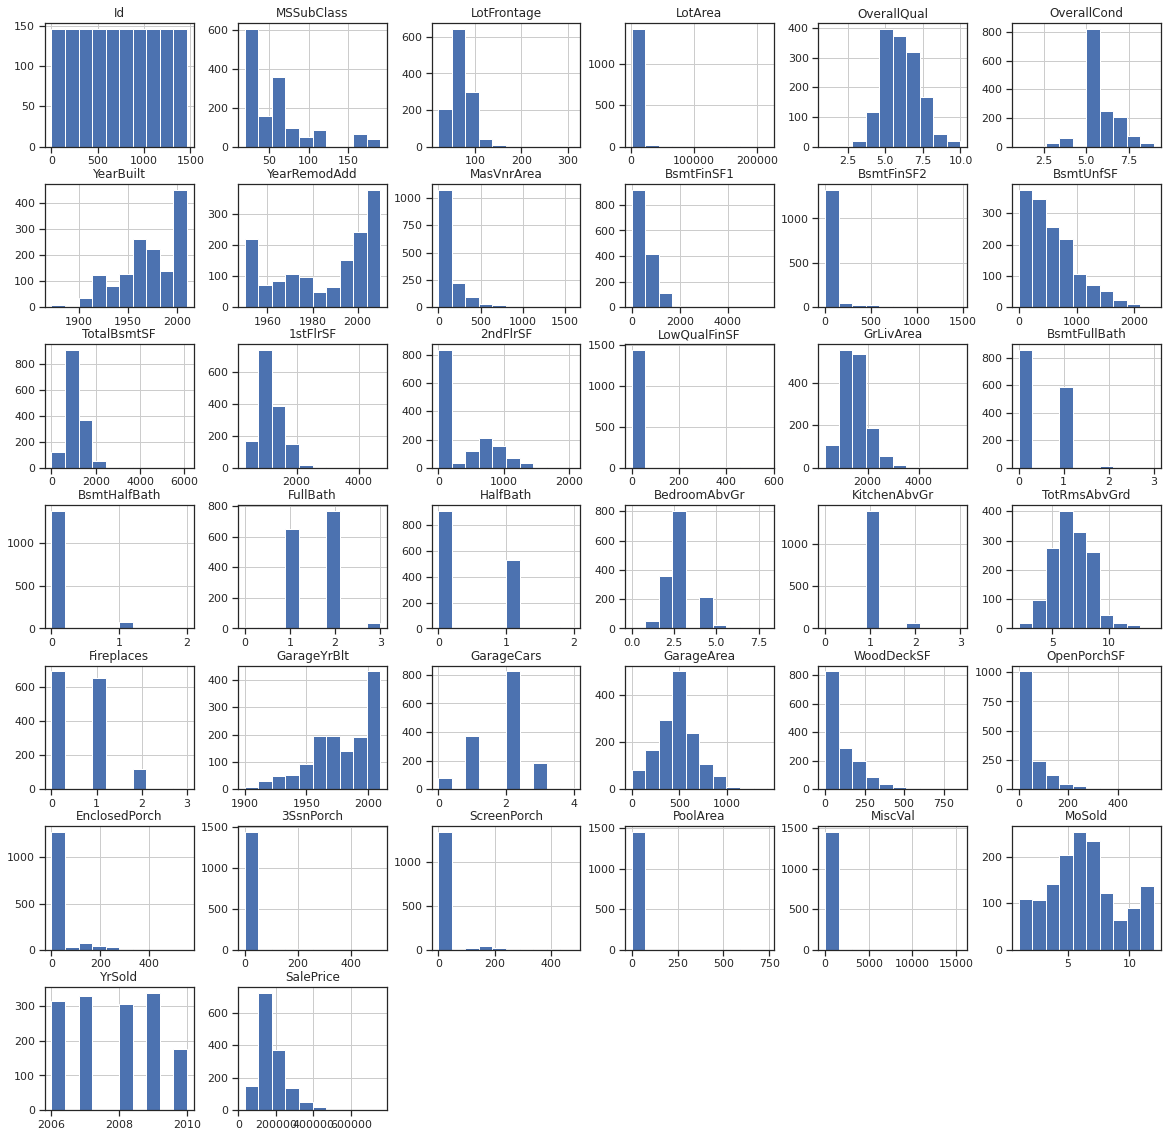

In [32]:
int_float_df = df.select_dtypes(include=['int64', 'float64'])
int_float_df.hist(figsize=(20,20))
print("-")

# Toujours sur les variables int64 + float64: Affichez les 10 variables les plus corrélées avec SalePrice (Avec Pandas il est possible de calculer les corrélation avec .corr()).

In [33]:
corr = int_float_df.corr()
corr10 = corr['SalePrice'].abs().sort_values(ascending=False)
new_df= corr10.head(11)
new_df

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

# Toujours sur les variables int64 + float64: Réalisez un pairplot permettant d'afficher la relation entre SalePrice et les variables sélectionnées. Quelle est la forme des plot croisant les 3 variables les plus corrélées avec SalePrice?

In [36]:
columns = ["SalePrice","OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd"]

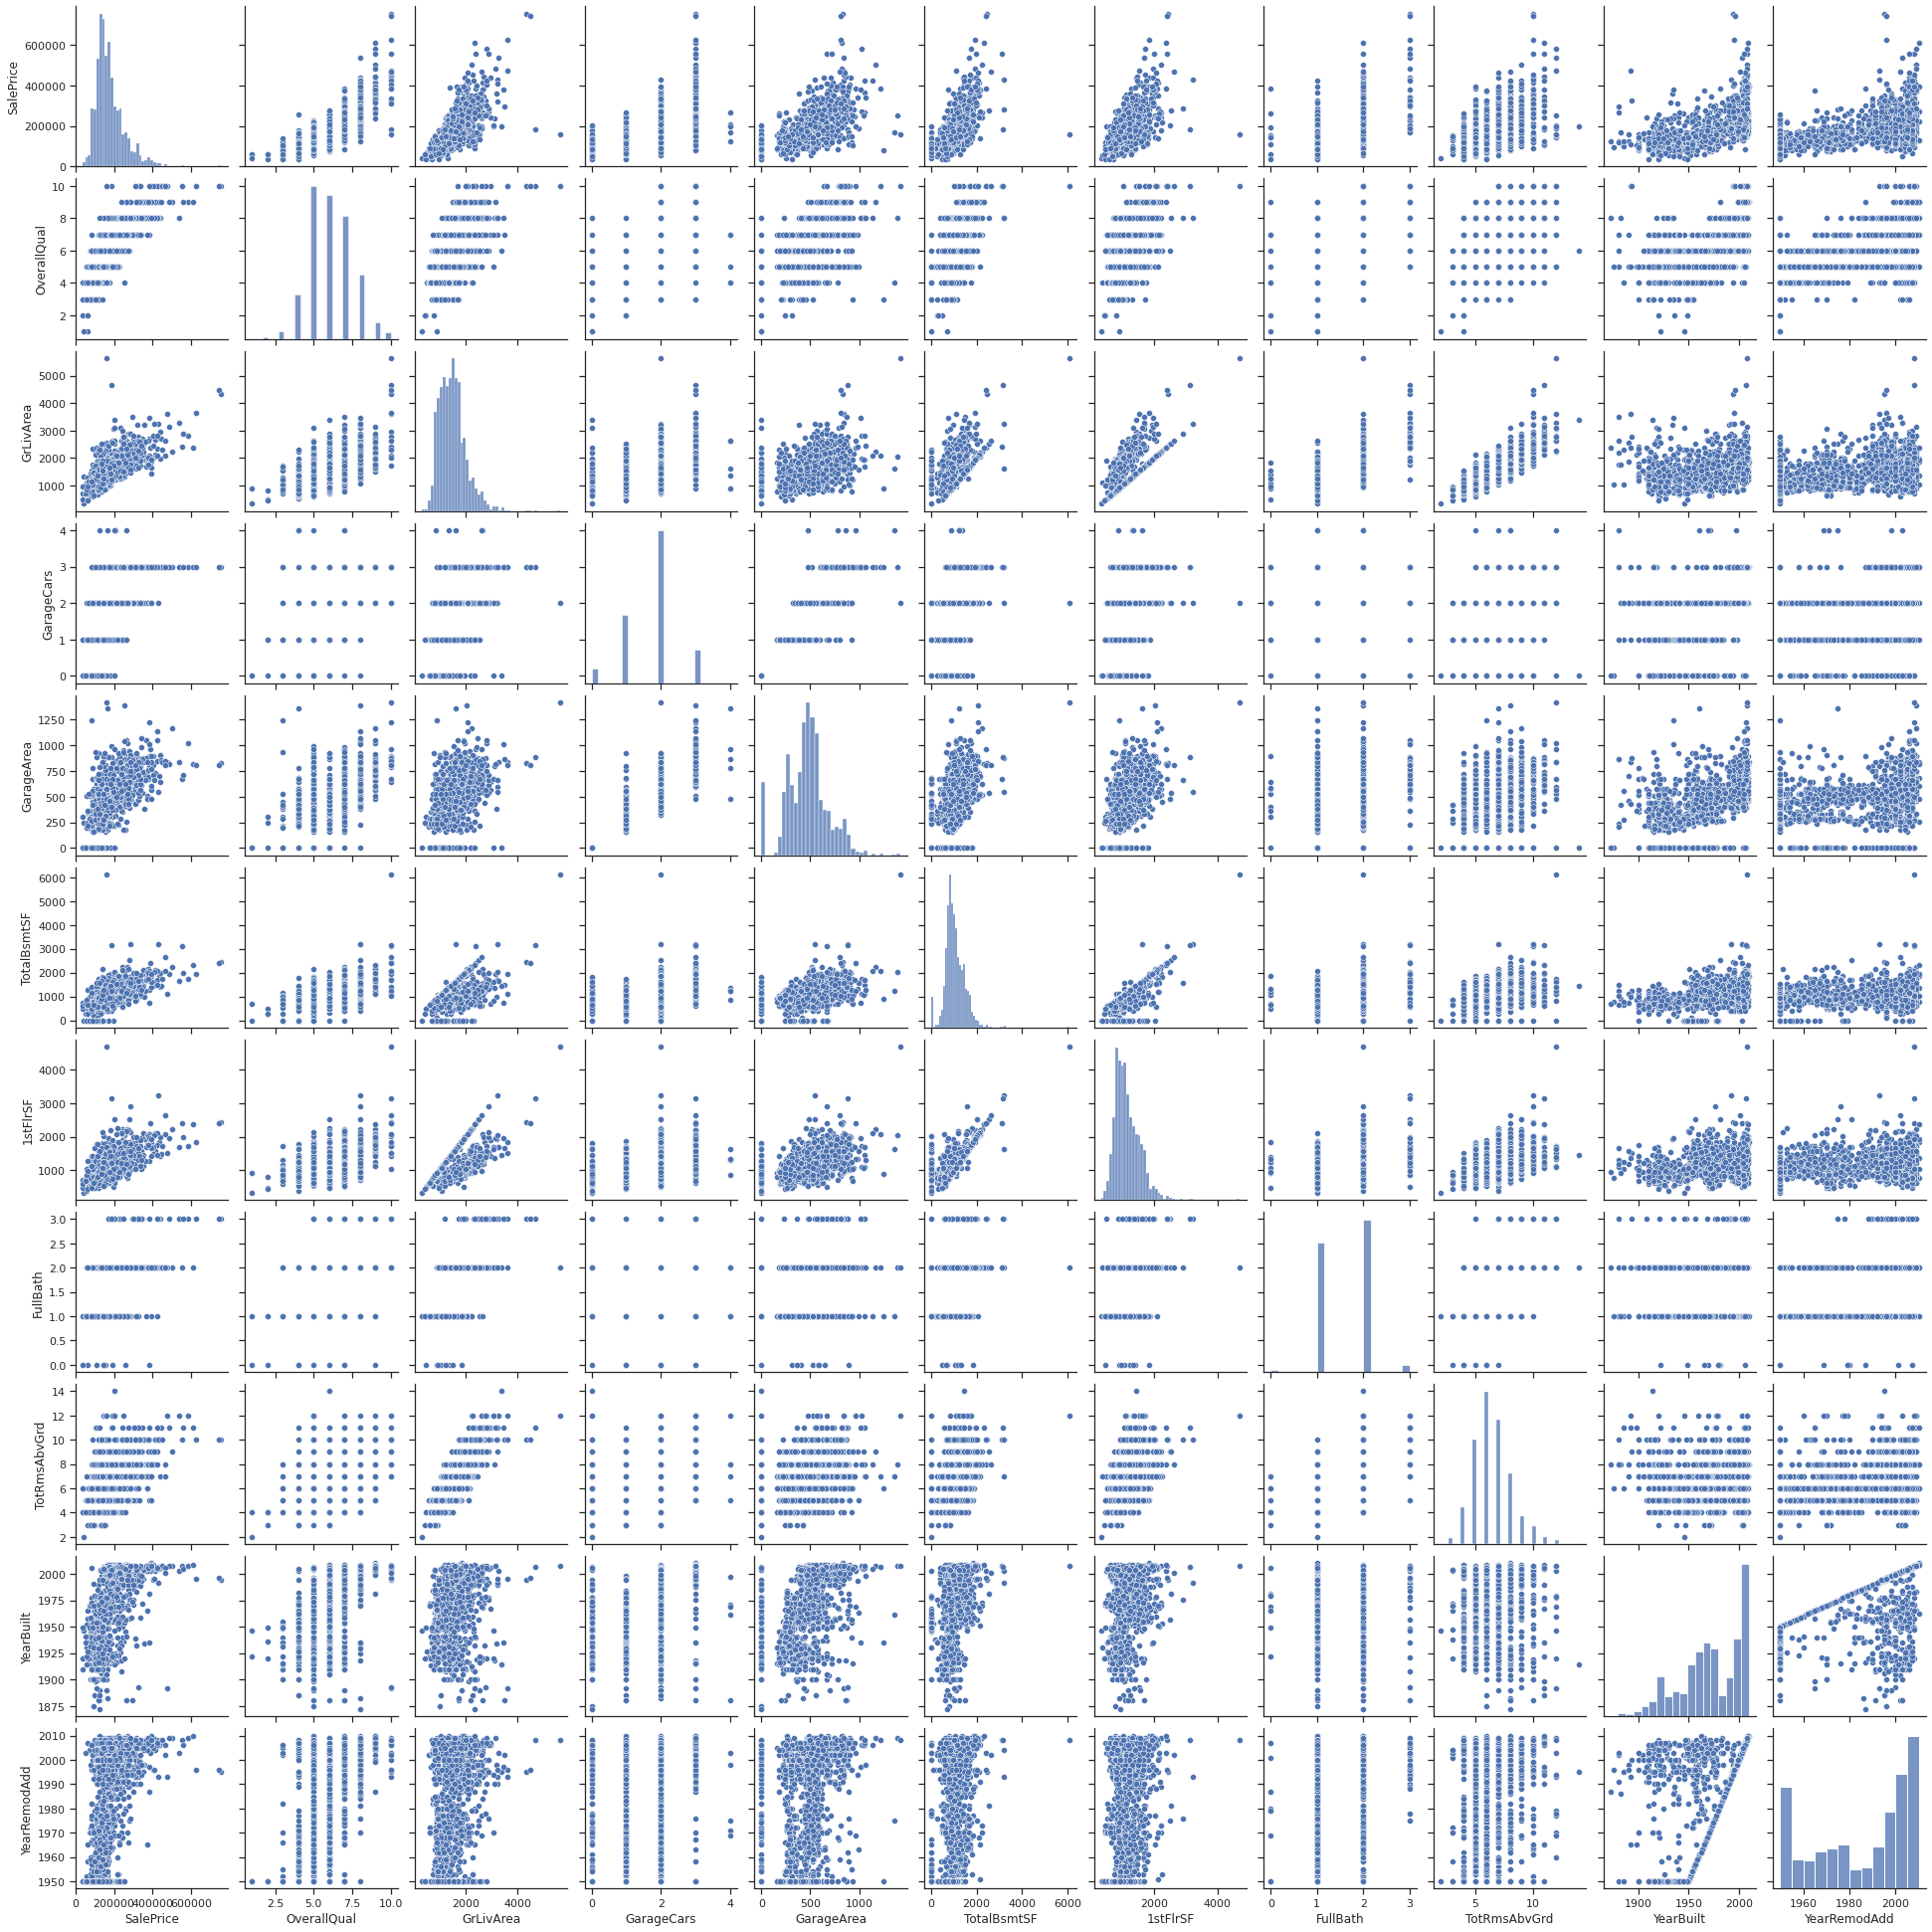

In [37]:
df_corr = int_float_df.loc[:,columns]
sns.pairplot(df_corr)

plt.show()


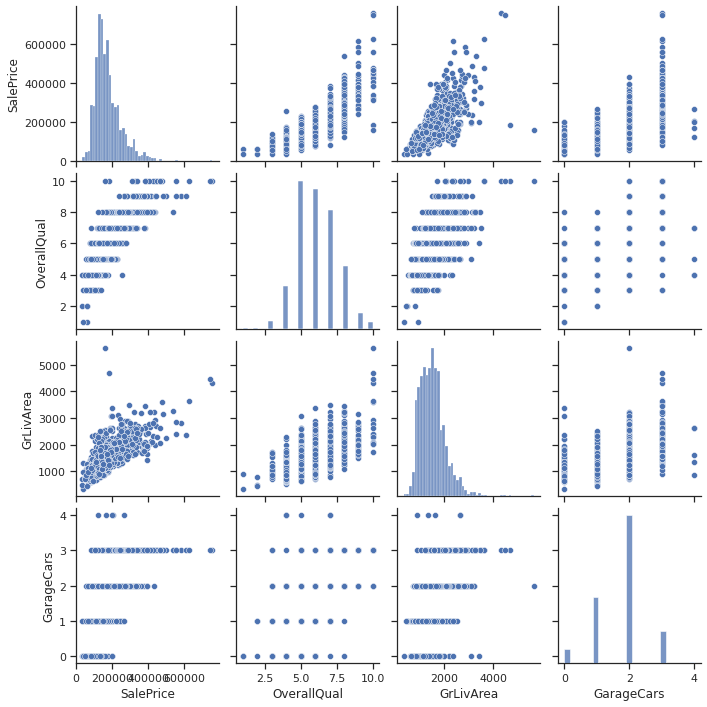

In [35]:
columns = ["SalePrice","OverallQual","GrLivArea","GarageCars"]
corr3 = int_float_df.loc[:,columns]
sns.pairplot(corr3)

plt.show()

# Réalisez une heatmap afin de visualiser d'une autre manière les corrélations 2 à 2. Y'a t'il des variables fortement corrélées entre elles? Identifiez les 3 pairs les plus corrélées

<AxesSubplot:>

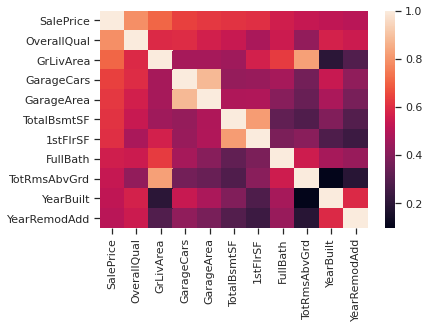

In [38]:
to_heat = int_float_df.loc[:,columns]
sns.heatmap(to_heat.corr())

les 3 paires les plus corélées:

    - garageCars / GarageArea
    - 1stFlrSF / TotalBsmtSF
    - GrLiveArea / TotRmsAbvGrd
    
la 4eme merite d'etre soulignèe car elle est plus proche des plus corélées que de la valeur juste aprés:

    - OverallQual / SalePrice

# Sur cette sélection de variables: ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'] réalisez un regplot permettant de croiser ces variables avec SalePrice.

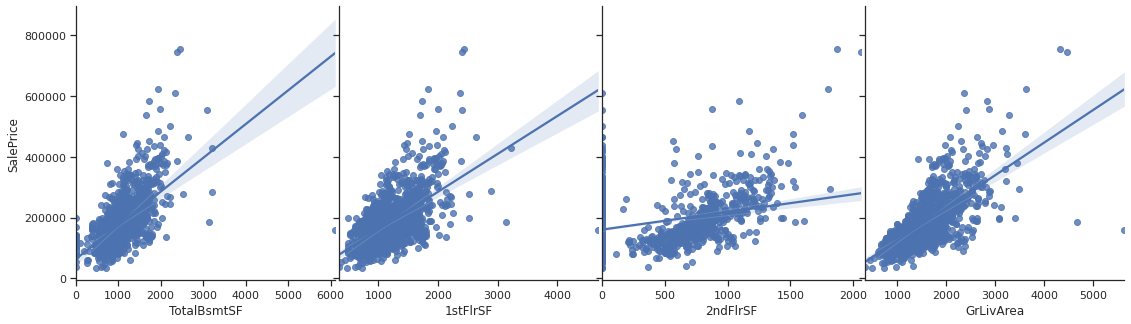

In [46]:
g = sns.PairGrid(df, y_vars=["SalePrice"], x_vars=['TotalBsmtSF', 
                                                   '1stFlrSF', '2ndFlrSF', 'GrLivArea'], height = 25)
g.map(sns.regplot)
fig=plt.gcf()
fig.set_size_inches(15,4)

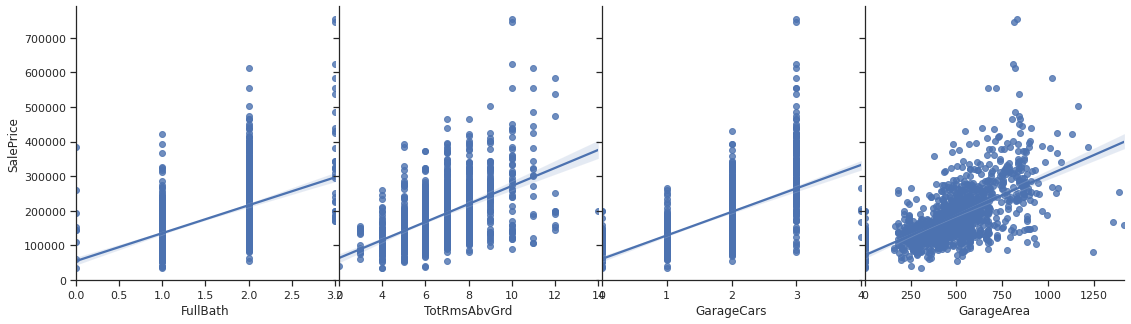

In [48]:
g = sns.PairGrid(df, y_vars=["SalePrice"], x_vars=[ 'FullBath', 'TotRmsAbvGrd',
                                                   'GarageCars', 'GarageArea'], height = 25)

g.map(sns.regplot)
fig=plt.gcf()
fig.set_size_inches(15,4)

# En vous inspirant de: https://stackoverflow.com/questions/25579227/seaborn-implot-with-equation-and-r2-text Afficher le jointplot avec le coefficient de pearson pour le croisement SalePrice & GrLivArea.

coefficient de pearson:  0.502148650271804


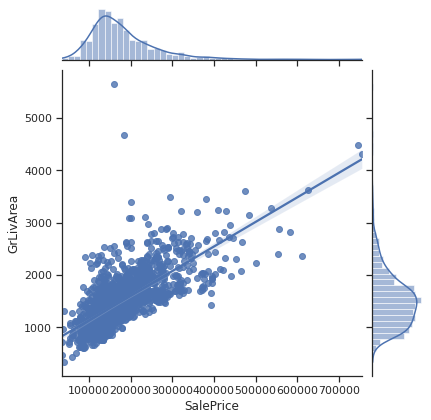

In [65]:
from scipy import stats

j = sns.jointplot(x = df["SalePrice"],y =df['GrLivArea'],kind ="reg")
print("coefficient de pearson: ",stats.pearsonr(df["SalePrice"],df['GrLivArea'])[0] **2)